In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='μ',
    map_property=lambda t: get_property(t, "μ"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [2.032093021529331, 1.6942516039789621, 1.5552062816497987, 1.490269959323706, 1.4530152168712946, 1.4235312170694718, 1.3946158922957634, 1.3686967287400627, 1.3425631152365618, 1.3170347852607867, 1.2919203138956552, 1.270904453678985, 1.2525405274613297, 1.2326764886294739, 1.2120715353199432, 1.188680179075569, 1.162694136263848, 1.1327648017914893, 1.101977899432915, 1.0731401357939354, 1.0440838066146072, 1.0237082878888504, 1.0038273790202183, 0.9840568301933929, 0.9660949073177745, 0.9484418219476367, 0.9292006877485237, 0.9124208283403044, 0.8956828387637938, 0.8786186507069901, 0.8605081671801909, 0.8477957203554259, 0.8335439974617845, 0.8214489648063749, 0.8091377494526607, 0.79823018189504, 0.7866448604023375, 0.7754244948840513, 0.7643485687708076, 0.7554106762160039, 0.7443826242889549, 0.7343295305474546, 0.727010160260145, 0.7160459285084365, 0.7087750515568739, 0.7007499214291784, 0.6921204841075678, 0.6858867870521351, 0.6763824645722357, 0.6697335961682203, 0.6611667145997767, 0.6539632010865895, 0.6472227012461649, 0.6427600549746082, 0.6356030737342412, 0.6306966438544114, 0.6249465833325031, 0.6200507441116759, 0.6135081213087493, 0.6078158495932013, 0.6023344706166605, 0.5975733852450027, 0.593377150559402, 0.588483586984656, 0.5847391998177236, 0.5804711319656487, 0.5745908405561949, 0.570646514264398, 0.5671012400326234, 0.5624692986321113, 0.5579399396454773, 0.5531474159858026, 0.5511602103914387, 0.5453380519647641, 0.5429886315276857, 0.5397848205820569, 0.5365904638265964, 0.5323480343276711, 0.5298396557735869, 0.5254475002755498, 0.5199822157070848, 0.5173471770181832, 0.5146461929839151, 0.5121050485731325, 0.5097022831641645, 0.5065159095379123, 0.5029653907303495, 0.5009907669371731, 0.49805690965935806, 0.4953222895486398, 0.4905336590227459, 0.48801722776382844, 0.4849260577134085, 0.4837718773655354, 0.4822135503953347, 0.47843327187342793, 0.4774656219693909, 0.47461338317113655, 0.47198079496843437, 0.46977014808386663]
</details>


<details>
  <summary>losses_val_mean</summary>
  [1.7895214478231918, 1.6337418778132553, 1.4985081083479423, 1.450501366254927, 1.4132235592848772, 1.3824456164363352, 1.3780544672979904, 1.3535549464197052, 1.3177691175879036, 1.3572353076002468, 1.2624624600827772, 1.2719577415797199, 1.2419452174620067, 1.2124400826656694, 1.220452884475114, 1.1764902702623083, 1.1528516877346224, 1.1215380337507115, 1.1023726826406621, 1.1662858145148824, 1.0709761028790452, 1.081939147337149, 1.028909289674097, 1.0102767270152357, 0.9933200779635414, 0.9611149784423976, 0.949285933172204, 0.9287175964884595, 0.9616911483506768, 0.9356821218490963, 0.9014537039407291, 0.8727932836207924, 0.8555813205065581, 0.8482196665194269, 0.8525973226802183, 0.8330075444324309, 0.8120697833788885, 0.8119270508135166, 0.7947199386188307, 0.800920483019906, 0.7775503738037385, 0.77826693576101, 0.7668279389098248, 0.7594165430346895, 0.7491092201228329, 0.7404483524366974, 0.7339105869363117, 0.7525252308617569, 0.7126084044346891, 0.7061626993594843, 0.7088369559974346, 0.6916879073871723, 0.735576056043496, 0.7042864440683978, 0.6849813126824843, 0.6740189393037563, 0.6724022926532094, 0.6572891731511518, 0.6635764205296988, 0.6690980040549963, 0.6500537734483676, 0.6471147733926919, 0.6370001243447911, 0.634793178328465, 0.6305420076708144, 0.6249325662496719, 0.6224881557240974, 0.6187175151794994, 0.6106192566504758, 0.614531530135065, 0.6010673924606792, 0.6015440078349625, 0.5902851526728217, 0.5881256627576851, 0.5991720489767798, 0.5972985454193187, 0.5861927184176283, 0.5801397814636612, 0.5809671367378212, 0.5669314174313003, 0.5789574900295016, 0.5663169251820681, 0.5737273668833859, 0.5709121323677495, 0.5522221256886299, 0.6083735906941883, 0.734493278926833, 0.5417813967882968, 0.5610697200840364, 0.5595204385537069, 0.5431478097235184, 0.5469025056154407, 0.5297192320624489, 0.5261815806889971, 0.5308849126972233, 0.5277205638746798, 0.5194053219641017, 0.5260634991949155, 0.5254759667067678, 0.5125224598272244]
</details>

In [ ]:
losses_train_mean_MSE = [0.04064186043058662, 0.03388503207957924, 0.031104125632995975, 0.02980539918647412, 0.02906030433742589, 0.028470624341389437, 0.027892317845915268, 0.027373934574801254, 0.026851262304731238, 0.026340695705215734, 0.025838406277913104, 0.025418089073579703, 0.025050810549226595, 0.02465352977258948, 0.024241430706398864, 0.02377360358151138, 0.023253882725276964, 0.022655296035829785, 0.0220395579886583, 0.021462802715878707, 0.020881676132292144, 0.020474165757777007, 0.020076547580404367, 0.019681136603867857, 0.01932189814635549, 0.018968836438952735, 0.018584013754970475, 0.018248416566806088, 0.017913656775275878, 0.017572373014139803, 0.017210163343603816, 0.01695591440710852, 0.01667087994923569, 0.016428979296127497, 0.016182754989053215, 0.0159646036379008, 0.01573289720804675, 0.015508489897681025, 0.015286971375416151, 0.015108213524320077, 0.014887652485779097, 0.014686590610949093, 0.0145402032052029, 0.01432091857016873, 0.014175501031137478, 0.014014998428583567, 0.013842409682151356, 0.013717735741042703, 0.013527649291444715, 0.013394671923364404, 0.013223334291995535, 0.013079264021731788, 0.012944454024923297, 0.012855201099492165, 0.012712061474684823, 0.012613932877088228, 0.012498931666650061, 0.012401014882233519, 0.012270162426174987, 0.012156316991864027, 0.012046689412333209, 0.011951467704900054, 0.01186754301118804, 0.01176967173969312, 0.011694783996354471, 0.011609422639312974, 0.0114918168111239, 0.011412930285287962, 0.011342024800652469, 0.011249385972642224, 0.011158798792909546, 0.011062948319716054, 0.011023204207828773, 0.010906761039295283, 0.010859772630553715, 0.010795696411641138, 0.010731809276531928, 0.010646960686553422, 0.010596793115471738, 0.010508950005510996, 0.010399644314141697, 0.010346943540363664, 0.010292923859678303, 0.01024210097146265, 0.010194045663283292, 0.010130318190758245, 0.01005930781460699, 0.010019815338743463, 0.009961138193187162, 0.009906445790972796, 0.009810673180454919, 0.009760344555276568, 0.009698521154268171, 0.009675437547310707, 0.009644271007906694, 0.009568665437468558, 0.009549312439387819, 0.00949226766342273, 0.009439615899368687, 0.009395402961677332]
losses_val_mean_MSE = [0.03579042895646384, 0.03267483755626511, 0.029970162166958848, 0.029010027325098543, 0.028264471185697543, 0.027648912328726703, 0.02756108934595981, 0.027071098928394103, 0.02635538235175807, 0.027144706152004937, 0.025249249201655544, 0.025439154831594396, 0.024838904349240135, 0.024248801653313386, 0.02440905768950228, 0.023529805405246167, 0.02305703375469245, 0.02243076067501423, 0.022047453652813243, 0.02332571629029765, 0.021419522057580905, 0.021638782946742978, 0.02057818579348194, 0.020205534540304715, 0.019866401559270826, 0.019222299568847953, 0.01898571866344408, 0.01857435192976919, 0.019233822967013536, 0.018713642436981925, 0.018029074078814582, 0.01745586567241585, 0.017111626410131163, 0.016964393330388537, 0.017051946453604364, 0.01666015088864862, 0.01624139566757777, 0.01623854101627033, 0.015894398772376615, 0.016018409660398122, 0.01555100747607477, 0.0155653387152202, 0.015336558778196497, 0.01518833086069379, 0.014982184402456657, 0.014808967048733947, 0.014678211738726235, 0.015050504617235139, 0.014252168088693782, 0.014123253987189686, 0.01417673911994869, 0.013833758147743448, 0.01471152112086992, 0.014085728881367957, 0.013699626253649686, 0.013480378786075126, 0.013448045853064187, 0.013145783463023036, 0.013271528410593975, 0.013381960081099925, 0.013001075468967352, 0.012942295467853837, 0.012740002486895823, 0.0126958635665693, 0.012610840153416287, 0.012498651324993438, 0.012449763114481949, 0.012374350303589987, 0.012212385133009516, 0.0122906306027013, 0.012021347849213583, 0.012030880156699252, 0.011805703053456433, 0.0117625132551537, 0.011983440979535596, 0.011945970908386373, 0.011723854368352566, 0.011602795629273223, 0.011619342734756424, 0.011338628348626005, 0.011579149800590032, 0.011326338503641363, 0.011474547337667718, 0.011418242647354991, 0.011044442513772599, 0.012167471813883765, 0.014689865578536661, 0.010835627935765937, 0.01122139440168073, 0.01119040877107414, 0.010862956194470369, 0.010938050112308815, 0.010594384641248978, 0.010523631613779942, 0.010617698253944464, 0.010554411277493595, 0.010388106439282034, 0.01052126998389831, 0.010509519334135355, 0.010250449196544489]

losses_train_mean_RMSE = list(map(lambda x: x**0.5, losses_train_mean_MSE))
losses_val_mean_RMSE = list(map(lambda x: x**0.5, losses_val_mean_MSE))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE μ, Д')
axs[1].plot(range(10, 100), losses_train_mean_RMSE[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE μ, Д')
print(losses_val_mean_RMSE[-1])
plt.show()

0.1012445020558869

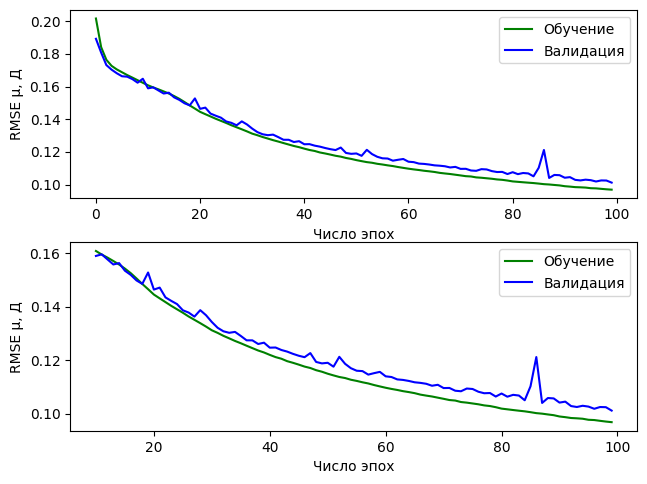